<a href="https://colab.research.google.com/github/Vibikshaj/AI_Vibiksha/blob/main/Diabetes_Prediction_System4053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

COLLECTION AND ANALYSIS OF DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
# Printing the first ten row of the dataset
diabetes_dataset.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [6]:
# Printing the last ten row of the dataset
diabetes_dataset.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
#Total number of rows & Columns
print("Total no of rows and coulmns=",diabetes_dataset.shape)

#statistical measure of the data
print("statistical measure")
diabetes_dataset.describe()

Total no of rows and coulmns= (768, 9)
statistical measure


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
#outcome
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

1=DIABETIC 0=NON DIABETIC

In [9]:
#outcome grouped my mean
print("outcome grouped my mean")
diabetes_dataset.groupby('Outcome').mean()


outcome grouped my mean


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [10]:

#outcome grouped my standard deviation
print("outcome grouped my standard deviation")
diabetes_dataset.groupby('Outcome').std()

outcome grouped my standard deviation


Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.017185  26.141200      18.063075      14.889947   98.865289   
1           3.741239  31.939622      21.491812      17.679711  138.689125   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.689855                  0.299085  11.667655  
1        7.262967                  0.372354  10.968254

In [11]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print (X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


DATA ANALYSIS THROUGH GRAPHS

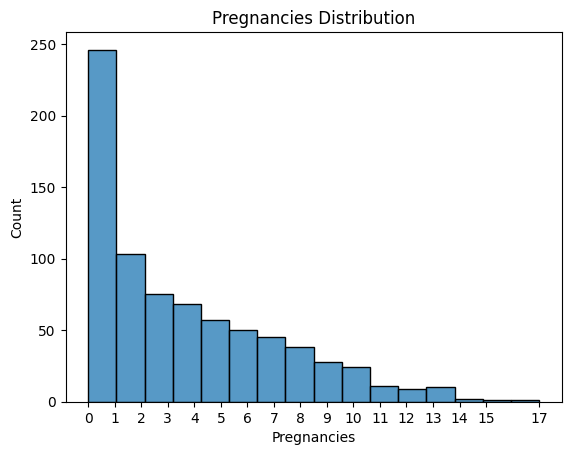

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =diabetes_dataset.columns
colors = ['Blue',"Green","Red","Black"]
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=diabetes_dataset, x=diabetes_dataset[cols[0]])
plt.xticks(ticks=[i for i in diabetes_dataset[cols[0]].unique()])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

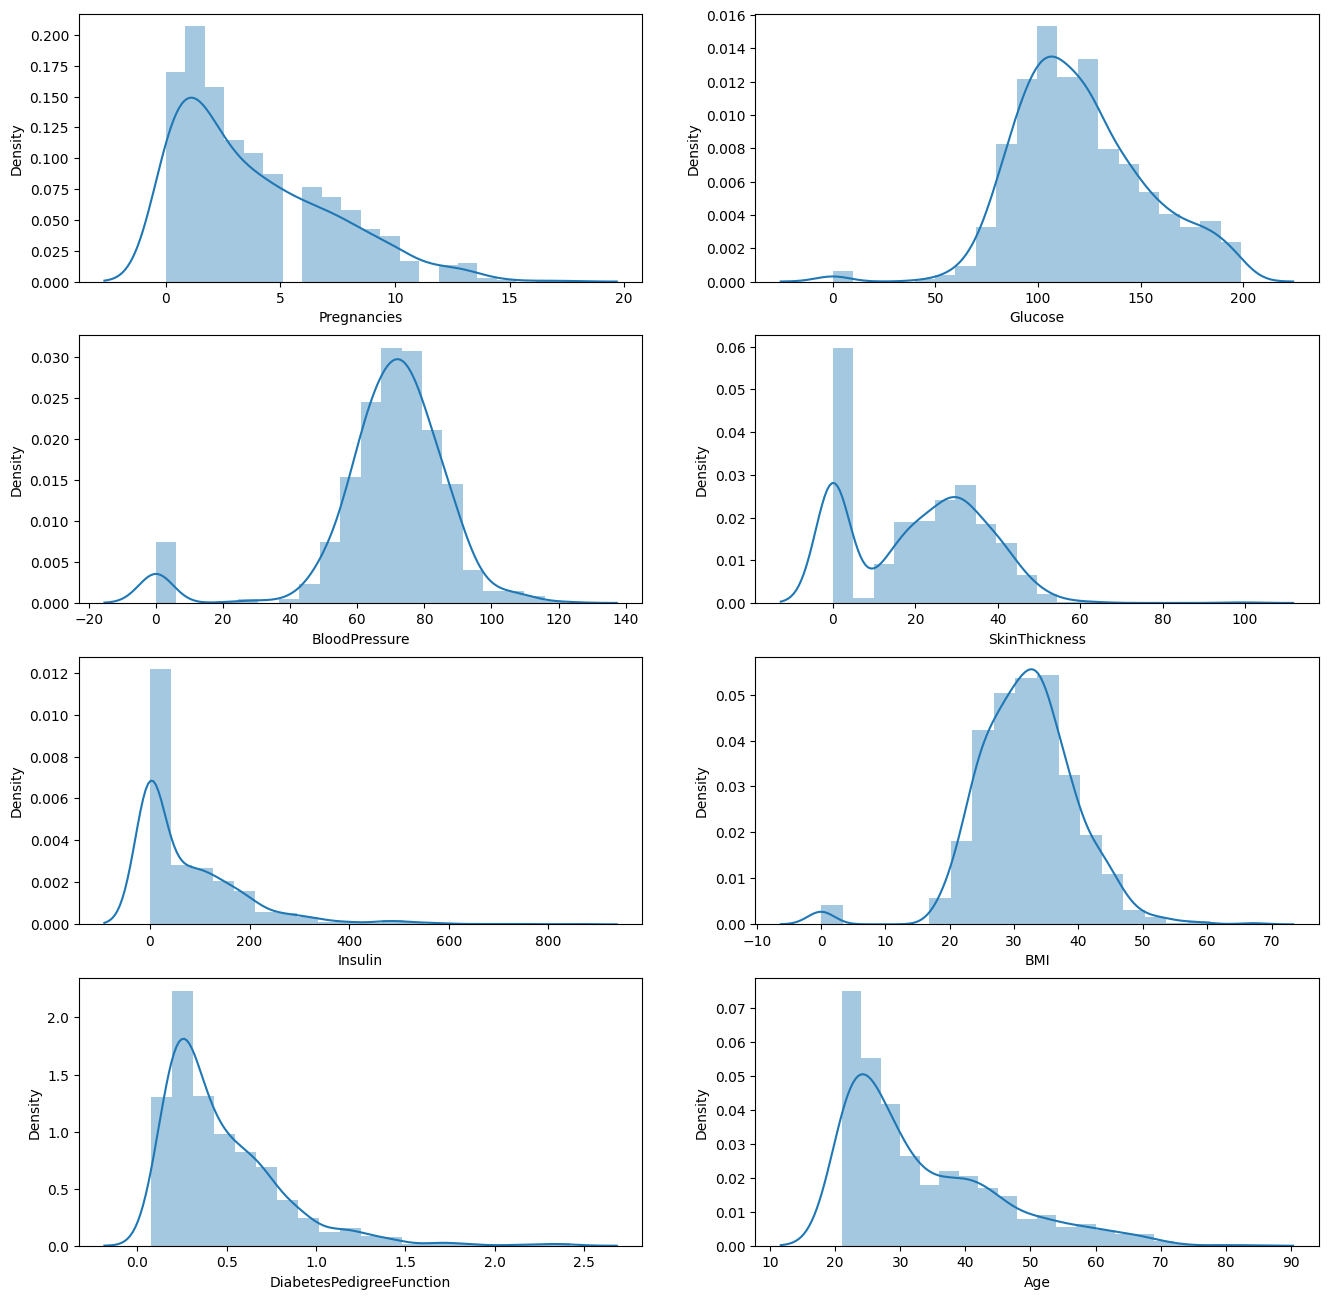

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset.Glucose, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset.BMI, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset.Age, bins = 20, ax=ax[3,1])

<Axes: xlabel='Age', ylabel='Count'>

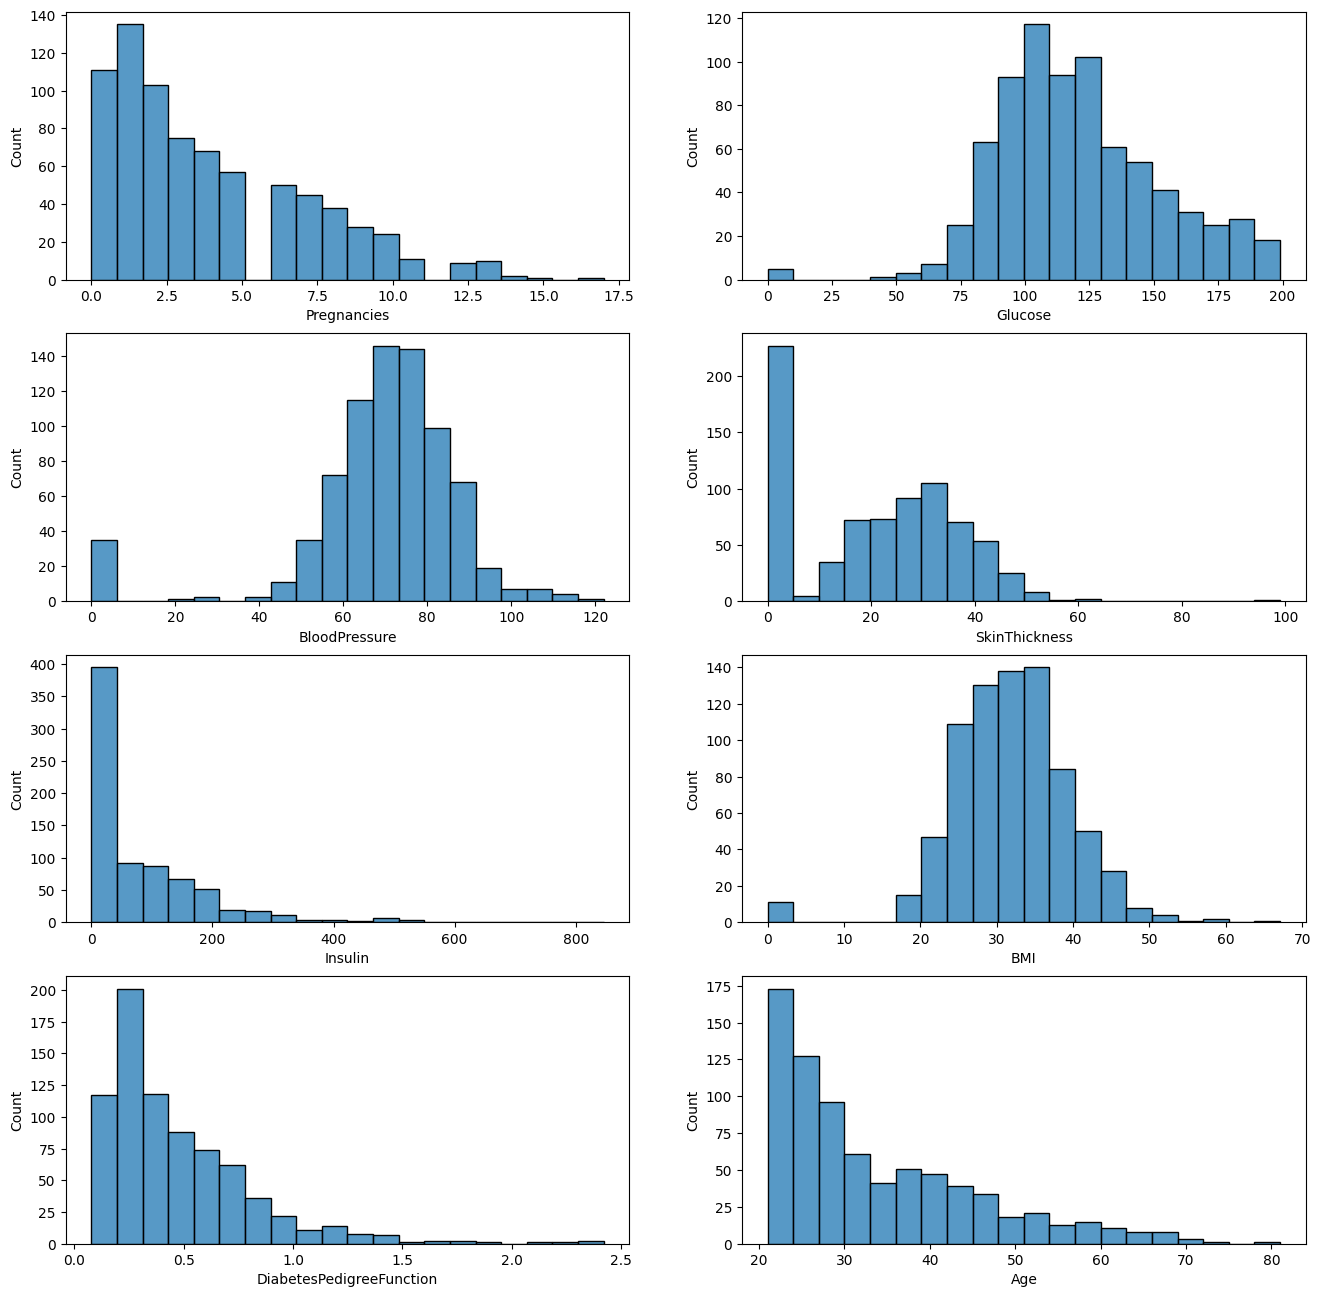

In [14]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,0])
sns.histplot(diabetes_dataset.Glucose, bins = 20, ax=ax[0,1])
sns.histplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,0])
sns.histplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[1,1])
sns.histplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,0])
sns.histplot(diabetes_dataset.BMI, bins = 20, ax=ax[2,1])
sns.histplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(diabetes_dataset.Age, bins = 20, ax=ax[3,1])

Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


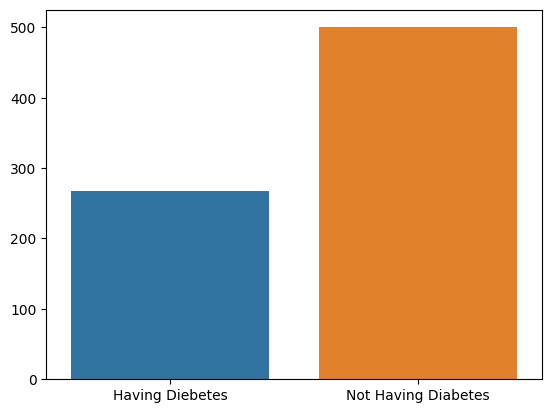

In [15]:
having_diabetes = diabetes_dataset[diabetes_dataset["Outcome"]==1]
not_having = diabetes_dataset[~(diabetes_dataset["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],

           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(diabetes_dataset),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(diabetes_dataset),2)) + " %")

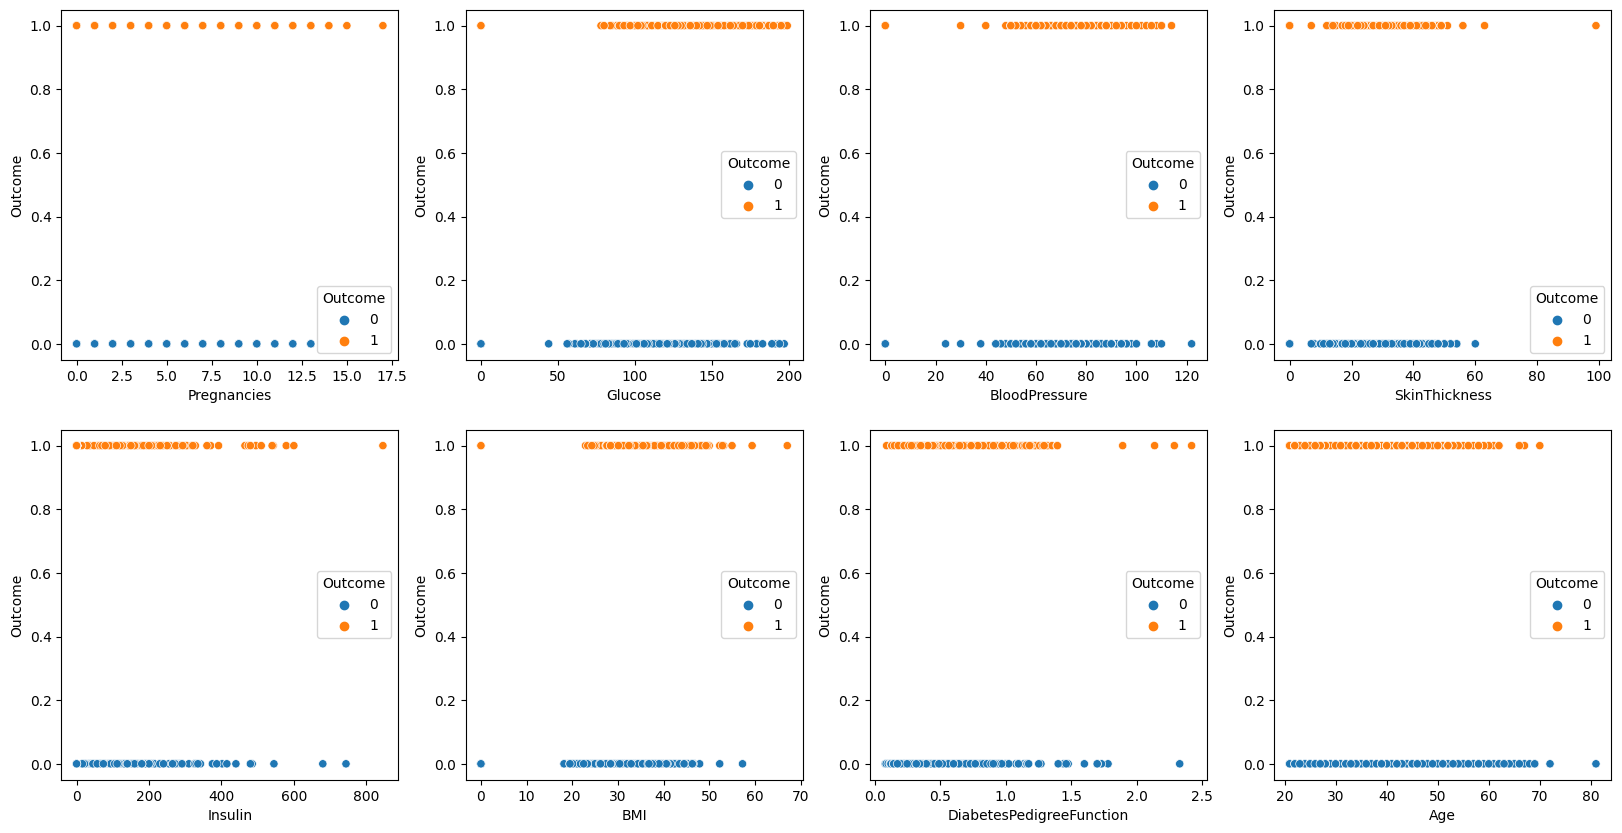

In [16]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=diabetes_dataset,hue='Outcome',ax=ax[i][j])
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row

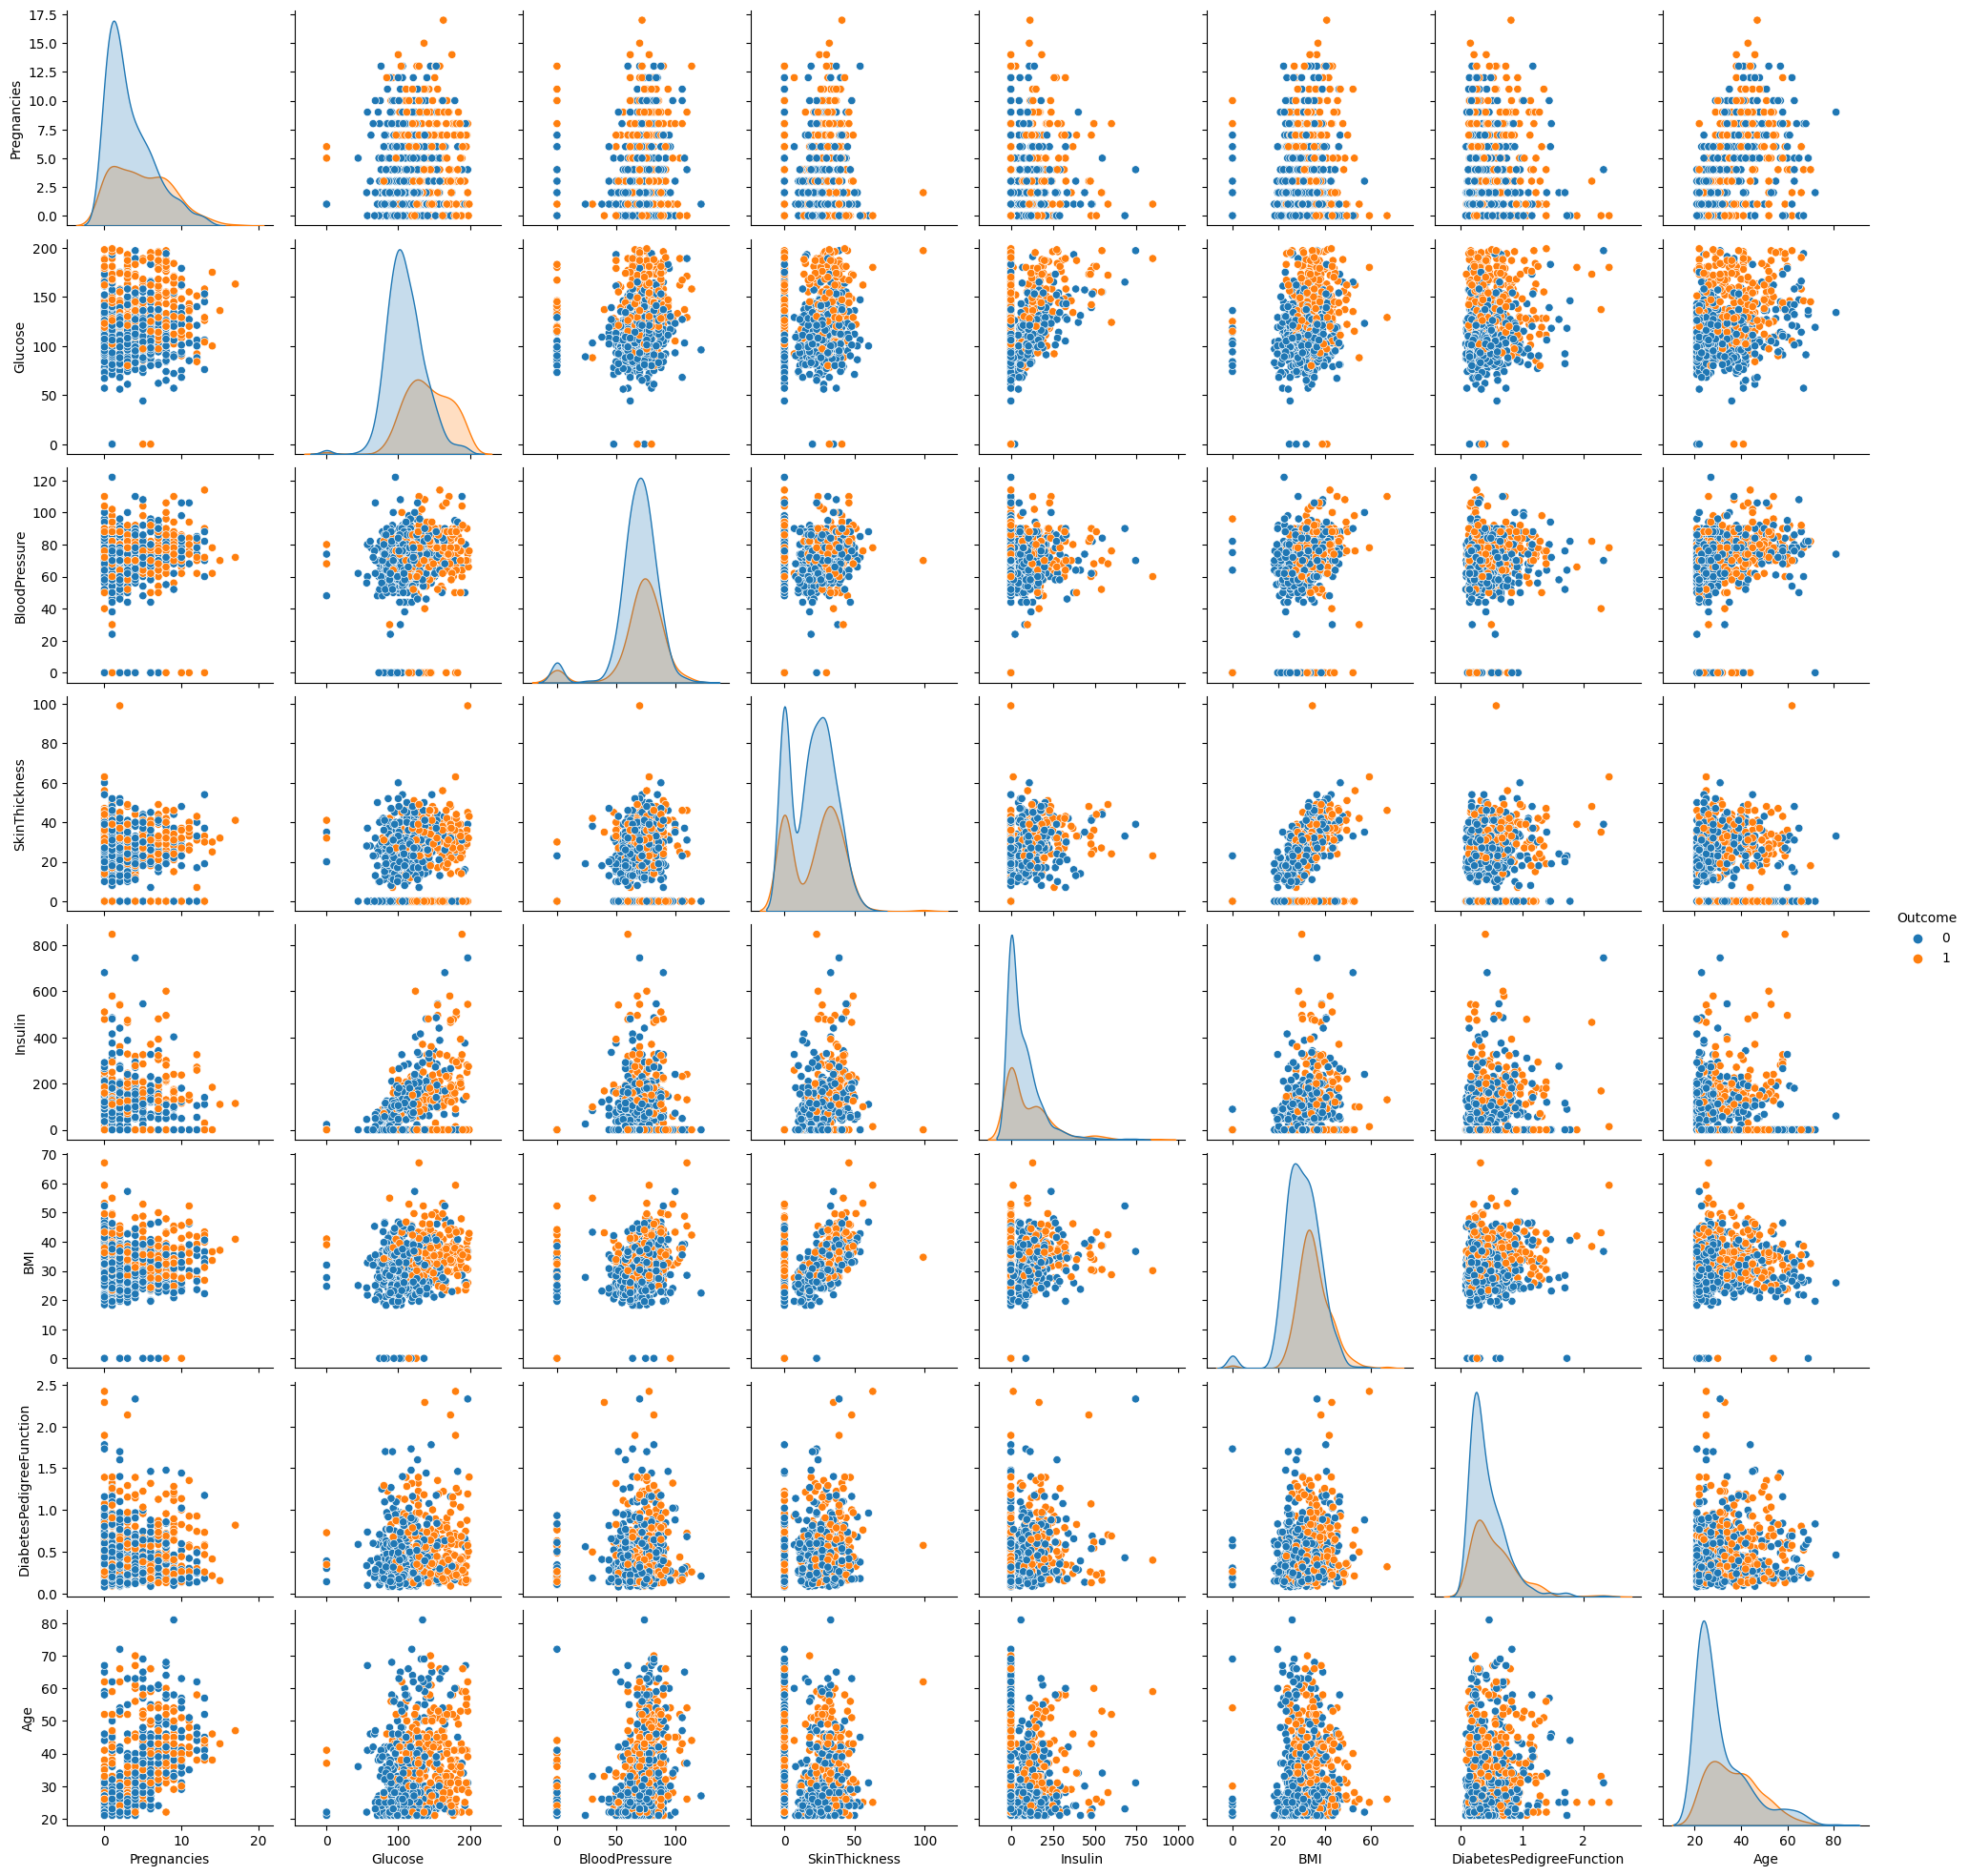

In [17]:
sns.pairplot(data=diabetes_dataset,hue='Outcome',hue_order=[0,1])

DATA AUGUMENTATION

In [18]:
import pandas as pd
import random

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Data augmentation logic
def augment_data(df, n=100):
    augmented_data = []
    for _ in range(n):
        # Implement your data augmentation techniques here
        # Example: Randomly shuffle rows
        augmented_data.append(df.sample(frac=1))
    augmented_df = pd.concat(augmented_data, ignore_index=True)
    return augmented_df

# Specify the number of augmentations you want (n) and call the function
n_augmentations = 100
augmented_df = augment_data(data, n_augmentations)

# Save augmented data to a new CSV file
augmented_df.to_csv('augmented_data.csv', index=False)

In [19]:
diabetes_dataset1 = pd.read_csv('/content/augmented_data.csv')

In [20]:
diabetes_dataset1.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      168             64              0        0  32.9   
1            6       93             50             30       64  28.7   
2            3      112             74             30        0  31.6   
3            3      106             72              0        0  25.8   
4            6      194             78              0        0  23.5   
5           11      136             84             35      130  28.3   
6            1      147             94             41        0  49.3   
7            3       82             70              0        0  21.1   
8            1       97             64             19       82  18.2   
9            1      144             82             40        0  41.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.135   41        1  
1                     0.356   23        0  
2                     0.197   25        1  
3                     0.207   27        0  
4                     0.129   59        1  
5                     0.260   42        1  
6                     0.358   27        1  
7                     0.389   25        0  
8                     0.299   21        0  
9                     0.607   28        0

In [21]:
# Printing the last ten row of the dataset
diabetes_dataset1.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
76790            1      181             64             30      180  34.1   
76791            6       80             80             36        0  39.8   
76792            1       97             64             19       82  18.2   
76793            0      123             88             37        0  35.2   
76794            0      198             66             32      274  41.3   
76795            1      115             70             30       96  34.6   
76796            1       89             66             23       94  28.1   
76797            9      119             80             35        0  29.0   
76798            9       91             68              0        0  24.2   
76799            4      147             74             25      293  34.9   

       DiabetesPedigreeFunction  Age  Outcome  
76790                     0.328   38        1  
76791                     0.177   28        0  
76792                     0.299   21        0  
76793                     0.197   29        0  
76794                     0.502   28        1  
76795                     0.529   32        1  
76796                     0.167   21        0  
76797                     0.263   29        1  
76798                     0.200   58        0  
76799                     0.385   30        0

In [22]:
#Total number of rows & Columns
print("Total no of rows and coulmns=",diabetes_dataset1.shape)

#statistical measure of the data
print("statistical measure")
diabetes_dataset1.describe()

Total no of rows and coulmns= (76800, 9)
statistical measure


Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  76800.000000  76800.000000   76800.000000   76800.000000  76800.000000   
mean       3.845052    120.894531      69.105469      20.536458     79.799479   
std        3.367406     31.952004      19.343328      15.941932    115.169699   
min        0.000000      0.000000       0.000000       0.000000      0.000000   
25%        1.000000     99.000000      62.000000       0.000000      0.000000   
50%        3.000000    117.000000      72.000000      23.000000     30.500000   
75%        6.000000    140.250000      80.000000      32.000000    127.250000   
max       17.000000    199.000000     122.000000      99.000000    846.000000   

                BMI  DiabetesPedigreeFunction           Age       Outcome  
count  76800.000000              76800.000000  76800.000000  76800.000000  
mean      31.992578                  0.471876     33.240885      0.348958  
std        7.879077                  0.331115     11.752649      0.476644  
min        0.000000                  0.078000     21.000000      0.000000  
25%       27.300000                  0.243750     24.000000      0.000000  
50%       32.000000                  0.372500     29.000000      0.000000  
75%       36.600000                  0.626250     41.000000      1.000000  
max       67.100000                  2.420000     81.000000      1.000000

In [23]:
diabetes_dataset1['Outcome'].value_counts()

0    50000
1    26800
Name: Outcome, dtype: int64

In [24]:
print("outcome grouped my mean")
diabetes_dataset1.groupby('Outcome').mean()

outcome grouped my mean


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [25]:
print("outcome grouped my standard deviation")
diabetes_dataset1.groupby('Outcome').std()

outcome grouped my standard deviation


Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.014196  26.115307      18.045184      14.875198   98.767362   
1           3.734322  31.880572      21.452078      17.647025  138.432717   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.682238                  0.298789  11.656098  
1        7.249540                  0.371666  10.947976

In [26]:
X = diabetes_dataset1.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset1['Outcome']
print (X)
print (Y)

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                5      168             64              0        0  32.9   
1                6       93             50             30       64  28.7   
2                3      112             74             30        0  31.6   
3                3      106             72              0        0  25.8   
4                6      194             78              0        0  23.5   
...            ...      ...            ...            ...      ...   ...   
76795            1      115             70             30       96  34.6   
76796            1       89             66             23       94  28.1   
76797            9      119             80             35        0  29.0   
76798            9       91             68              0        0  24.2   
76799            4      147             74             25      293  34.9   

       DiabetesPedigreeFunction  Age  
0                         0.135   41  
1        

AUGUMENTED DATA ANALYSIS THROUGH GRAPHS

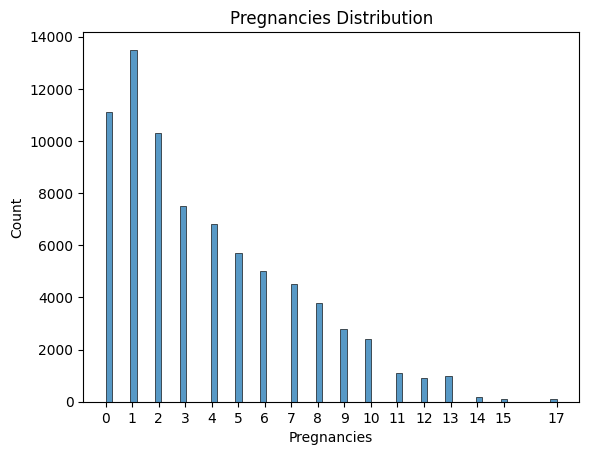

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =diabetes_dataset1.columns
colors = ['Blue',"Green","Red","Black"]
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=diabetes_dataset1, x=diabetes_dataset1[cols[0]])
plt.xticks(ticks=[i for i in diabetes_dataset1[cols[0]].unique()])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

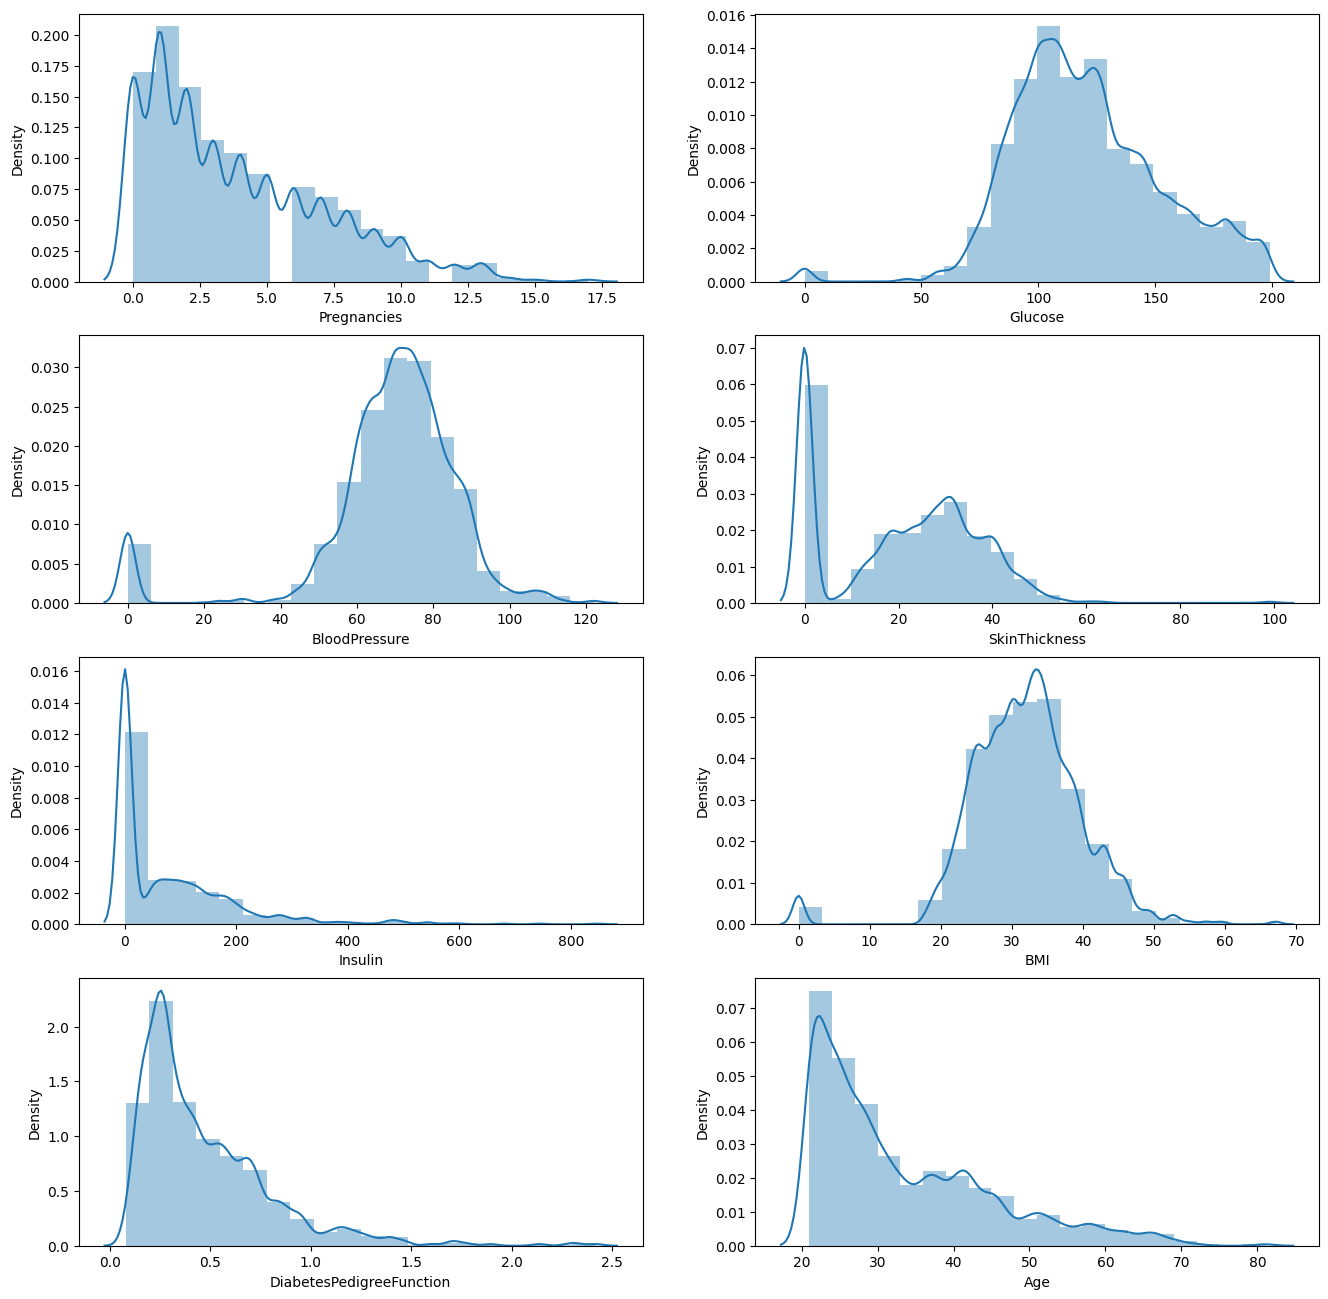

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_dataset1.Pregnancies, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset1.Glucose, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset1.BloodPressure, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset1.SkinThickness, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset1.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset1.BMI, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset1.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset1.Age, bins = 20, ax=ax[3,1])

<Axes: xlabel='Age', ylabel='Count'>

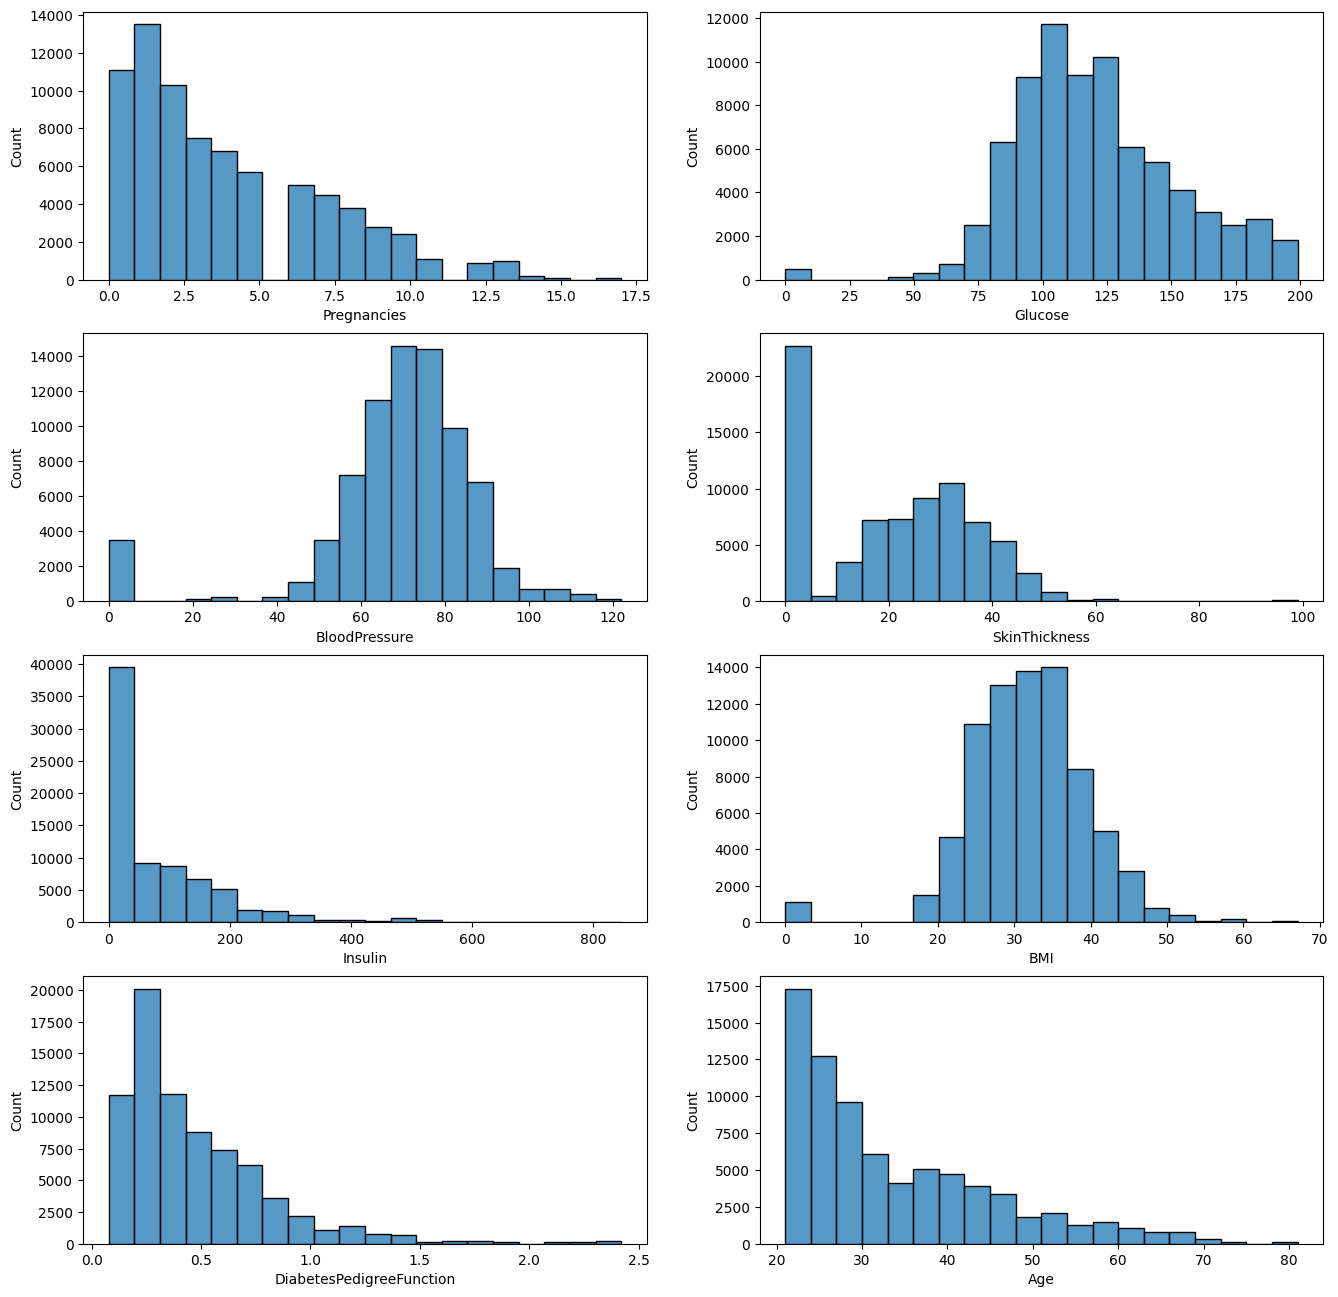

In [29]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(diabetes_dataset1.Pregnancies, bins = 20, ax=ax[0,0])
sns.histplot(diabetes_dataset1.Glucose, bins = 20, ax=ax[0,1])
sns.histplot(diabetes_dataset1.BloodPressure, bins = 20, ax=ax[1,0])
sns.histplot(diabetes_dataset1.SkinThickness, bins = 20, ax=ax[1,1])
sns.histplot(diabetes_dataset1.Insulin, bins = 20, ax=ax[2,0])
sns.histplot(diabetes_dataset1.BMI, bins = 20, ax=ax[2,1])
sns.histplot(diabetes_dataset1.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(diabetes_dataset1.Age, bins = 20, ax=ax[3,1])

OBSERVATIONS

1.The dataset contains more younger people. 2.The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity. 3.Majority of People having insuling less than 200 4.Majority of people having Skinthickness between 20-40 5.Majority of People having BP between 60-80

CORRELATION MATRIX

In [30]:
diabetes_dataset1.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

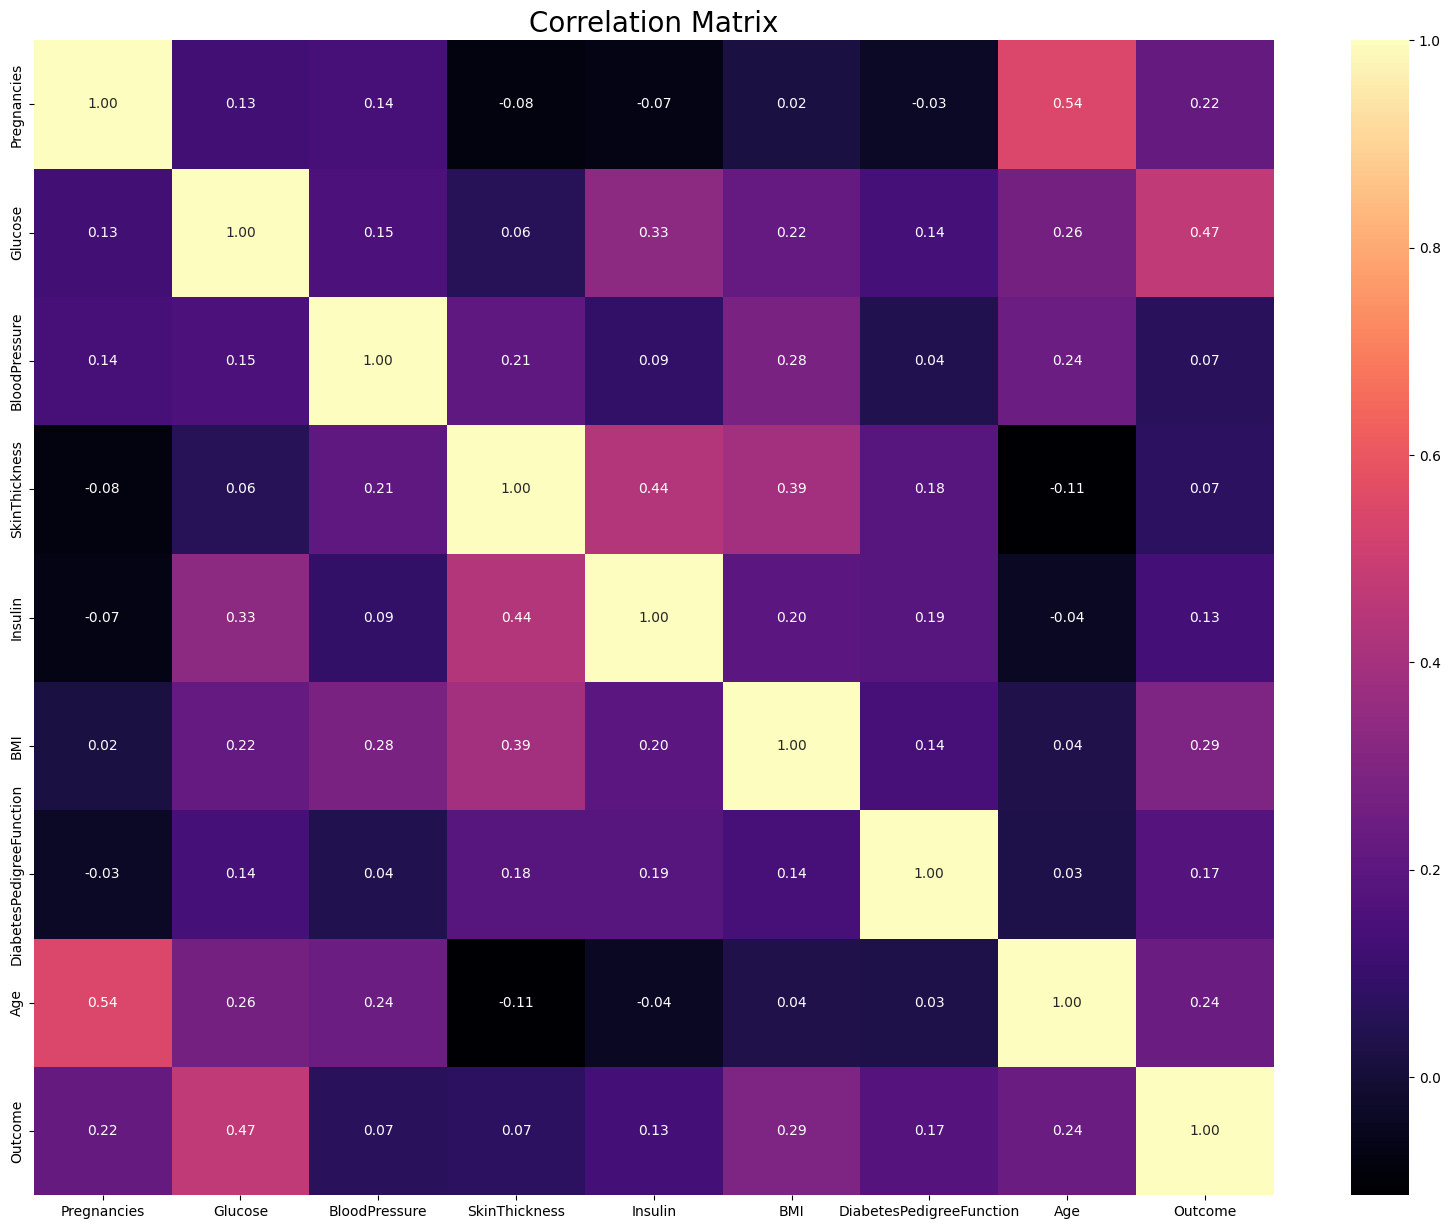

In [31]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diabetes_dataset1.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


Having Diebetes:	26800
Not Having Diebetes:	50000
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


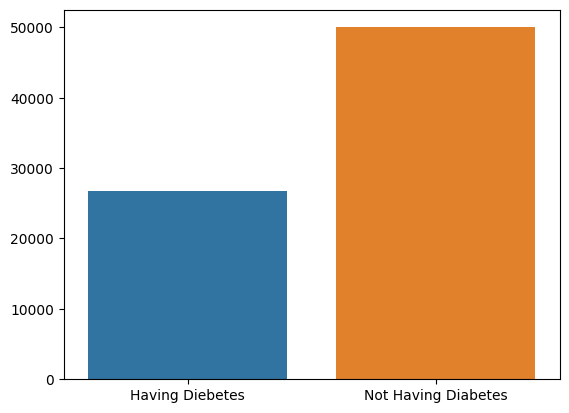

In [32]:
having_diabetes = diabetes_dataset1[diabetes_dataset1["Outcome"]==1]
not_having = diabetes_dataset1[~(diabetes_dataset1["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],

           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(diabetes_dataset1),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(diabetes_dataset1),2)) + " %")

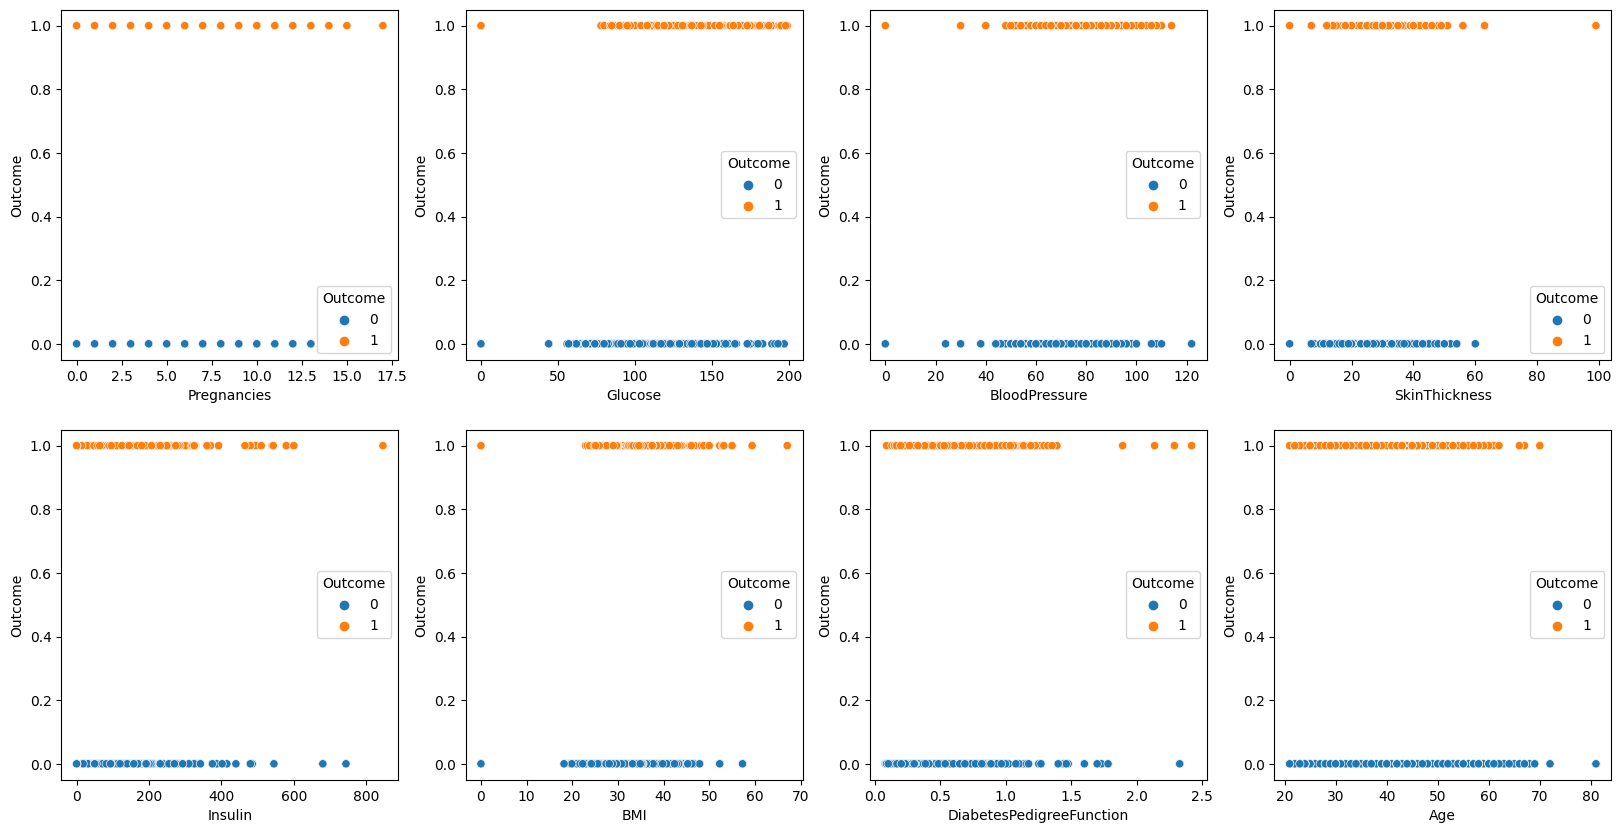

In [33]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=diabetes_dataset1,hue='Outcome',ax=ax[i][j])
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row


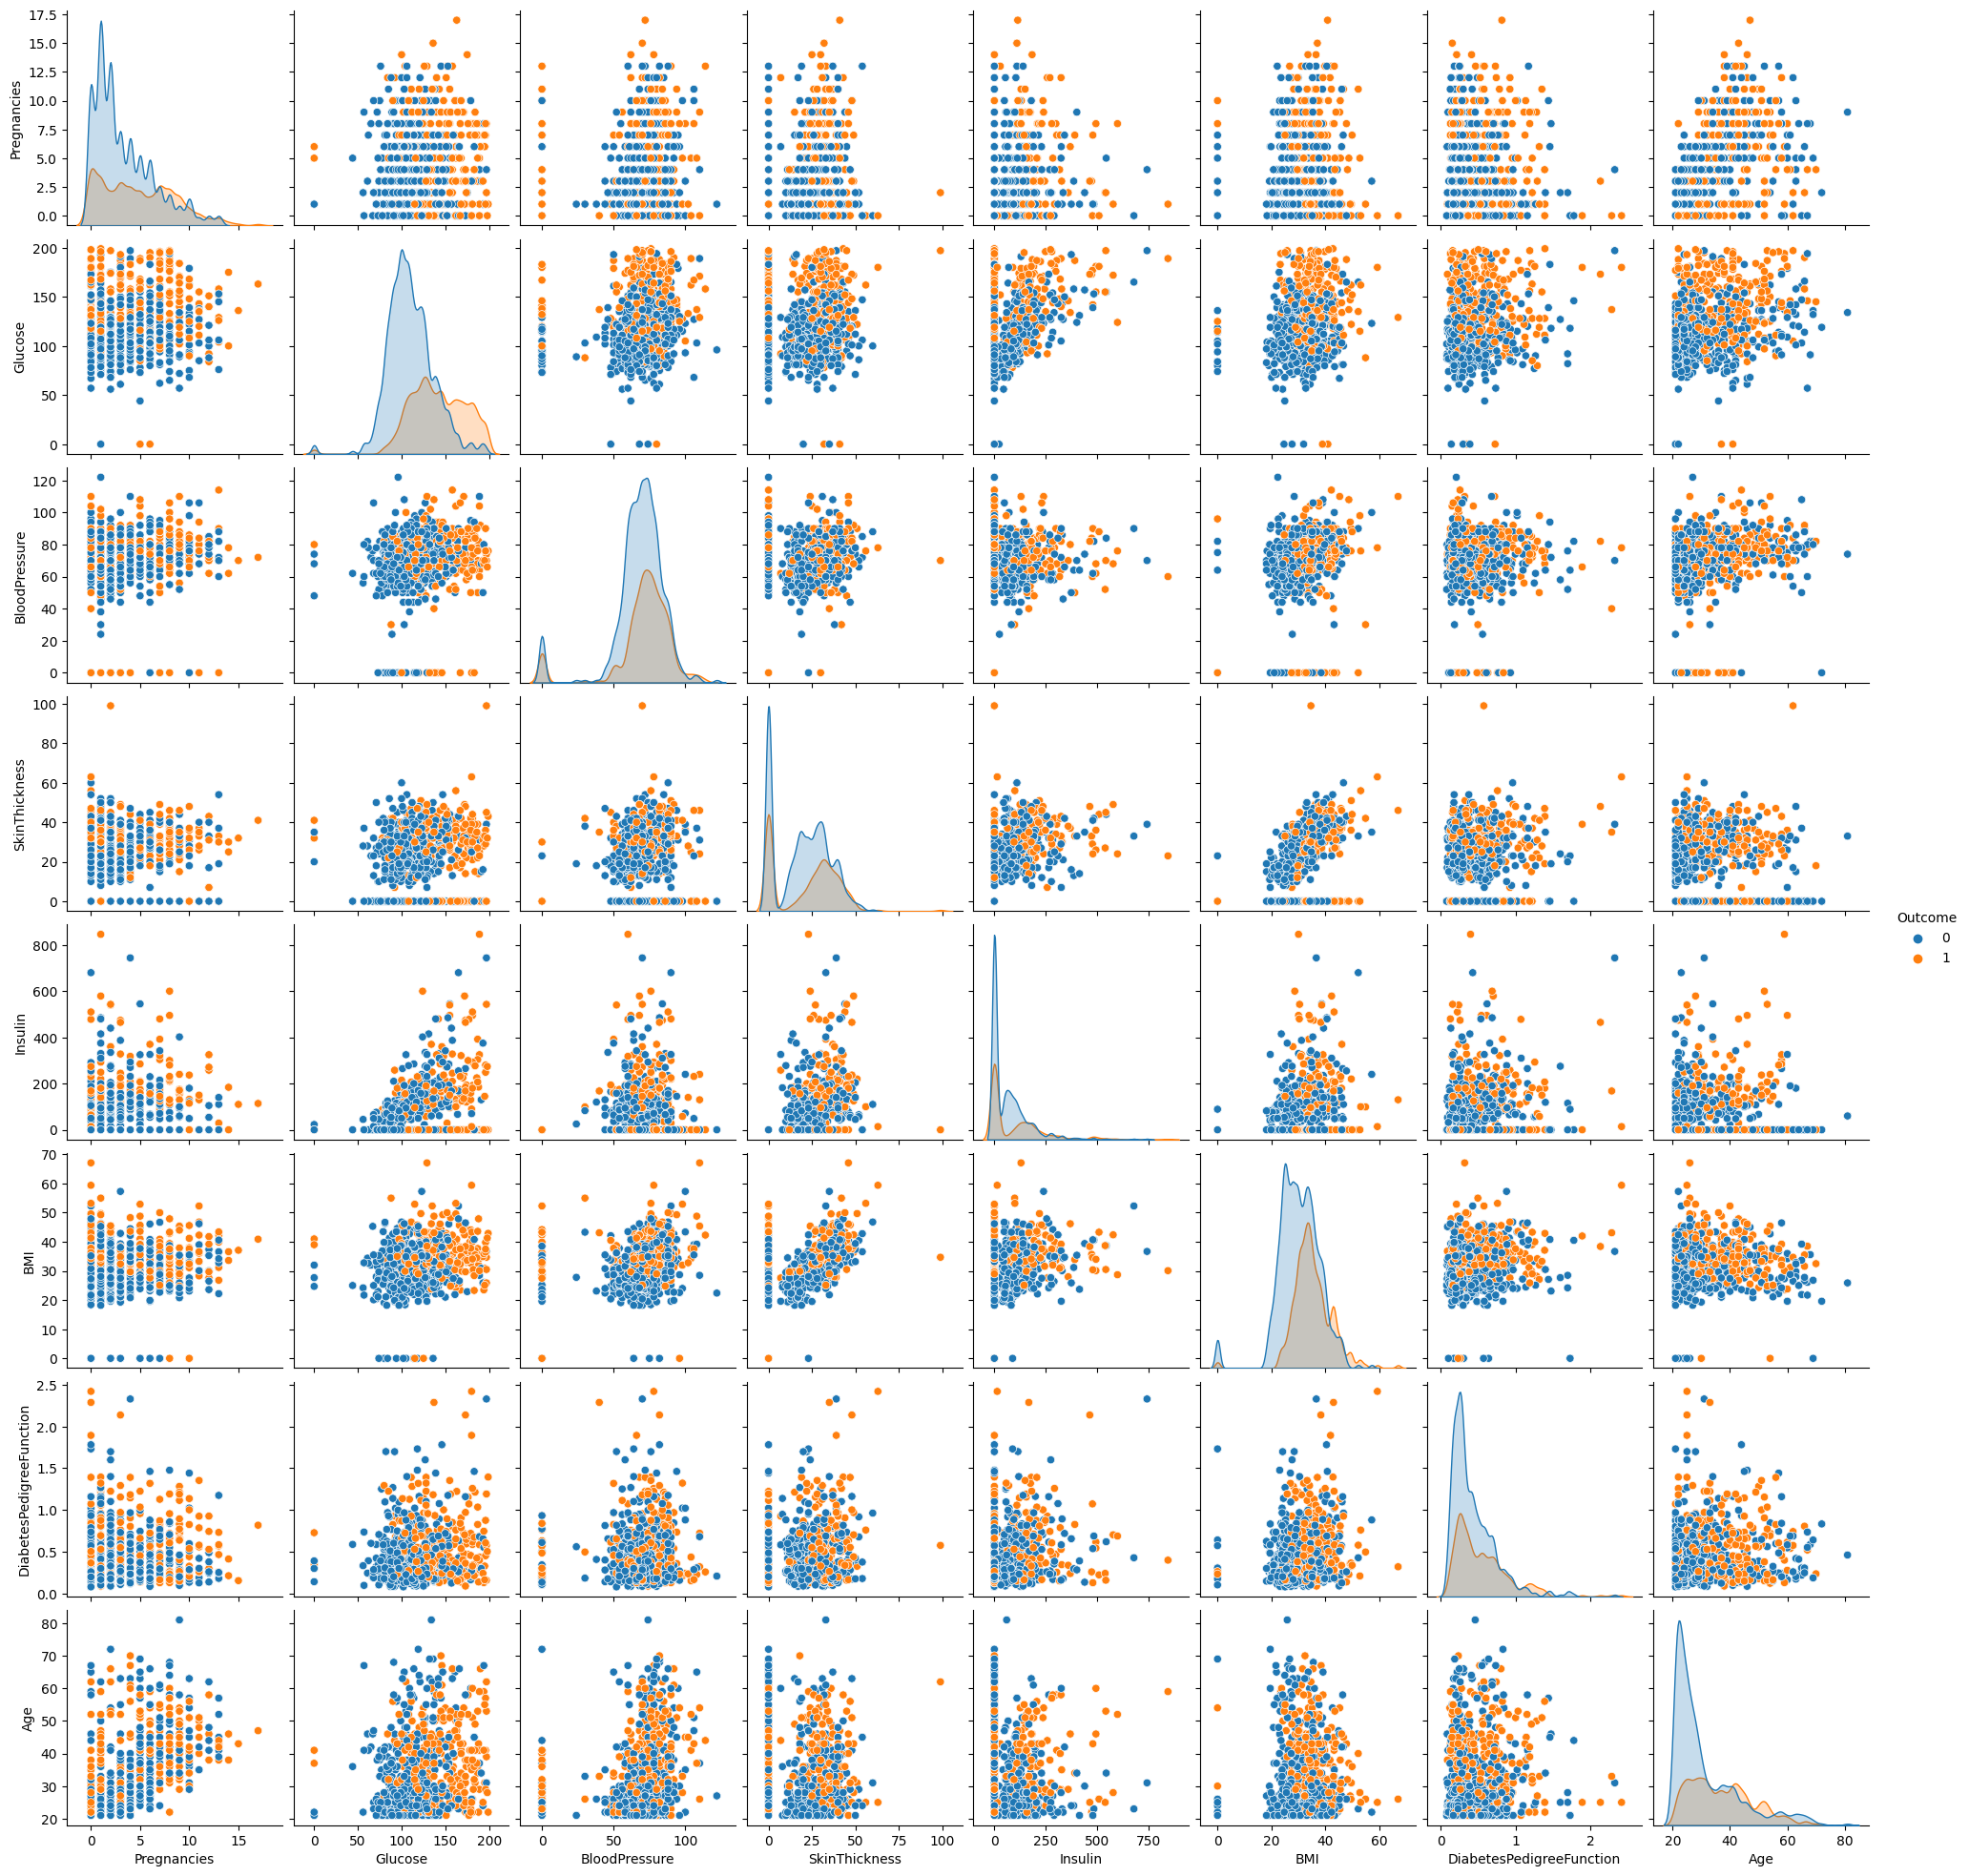

In [34]:
sns.pairplot(data=diabetes_dataset1,hue='Outcome',hue_order=[0,1])